In [43]:
import random

import numpy as np
import matplotlib.pyplot as plt

# read metis output file
with open(r'ig_communities_output.metis', 'r') as fp:
    file = fp.readlines()

# create 3-tupel for every community
# ( number of members | size of overlap | members of community as set )
communities = {k: [len(file[k].replace('\n', '').split(' ')), 0, set(file[k].replace('\n', '').split(' '))] for k in range(0, len(file))}

# find biggest id of members
#biggest_id = 0
#for i in range(0, len(communities)):
#    for other_id in communities[i][2]:
#        if int(other_id) > biggest_id:
#            biggest_id = int(other_id)

# print("biggest id: " + str(biggest_id))

# biggest id: 11322222

# choose 1000 random members and identify their communities
communities_of_members = {}

for i in range(0, 3):
    community_id = random.randint(0, len(communities) - 1)
    member_id = list(communities[community_id][2])[random.randint(0, len(communities[community_id][2]) - 1)]

    for j in range(0, len(communities)):
        if str(member_id) in communities[j][2]:
            if member_id in communities_of_members:
                communities_of_members[member_id].append(j + 1)
            else:
                communities_of_members[member_id] = []
                communities_of_members[member_id].append(j + 1)

print(len(communities_of_members))

3


In [44]:
# write members with their corresponding communities to file
members_file = open("chosen_members.txt", "w")

chosen_members = list(communities_of_members)
for i in range(0, len(chosen_members)):
    members_file.write(str(chosen_members[i]) + ": " + str(communities_of_members[chosen_members[i]]) + "\n")

members_file.close()

In [45]:
# merge chosen communities to single list
chosen_communities = []

for i in range(0, len(chosen_members)):
    chosen_communities += communities_of_members[chosen_members[i]]

# print(chosen_communities)
print(len(chosen_communities))

90


In [46]:
# create x-axis (size of communities)
x_data = []

for i in range(0, len(chosen_communities)):
    community_size = communities[chosen_communities[i]][0]

    if not community_size in x_data:
        x_data.append(community_size)

x_data = sorted(x_data)

x_min = x_data[0]
x_max = x_data[len(x_data) - 1]

print(x_max)
print(x_min)

x_data = [*range(0, x_max + 1)]
# print(x_data)

182
4


In [47]:
# create y-axis (size of overlap) and z-axis (number of communities with a certain size and overlap)
y_data = [*range(0, x_max + 1)]

z_grid = []
for y_val in y_data:
    row = [0] * len(x_data)
    z_grid.append(row)

for i in range(0, len(chosen_communities)):
    for j in range(i + 1, len(chosen_communities)):
        size_of_overlap = len(communities[chosen_communities[i]][2].intersection(communities[chosen_communities[j]][2]))

        community_size_idx = x_data.index(communities[chosen_communities[i]][0])
        overlap_size_idx = y_data.index(size_of_overlap)

        if False: #size_of_overlap > 0:
            print(size_of_overlap)
            print(community_size_idx)
            print(overlap_size_idx)
            print("----")

        z_grid[overlap_size_idx][community_size_idx] += 1

# print(z_grid[0])

z_data = np.array(z_grid)

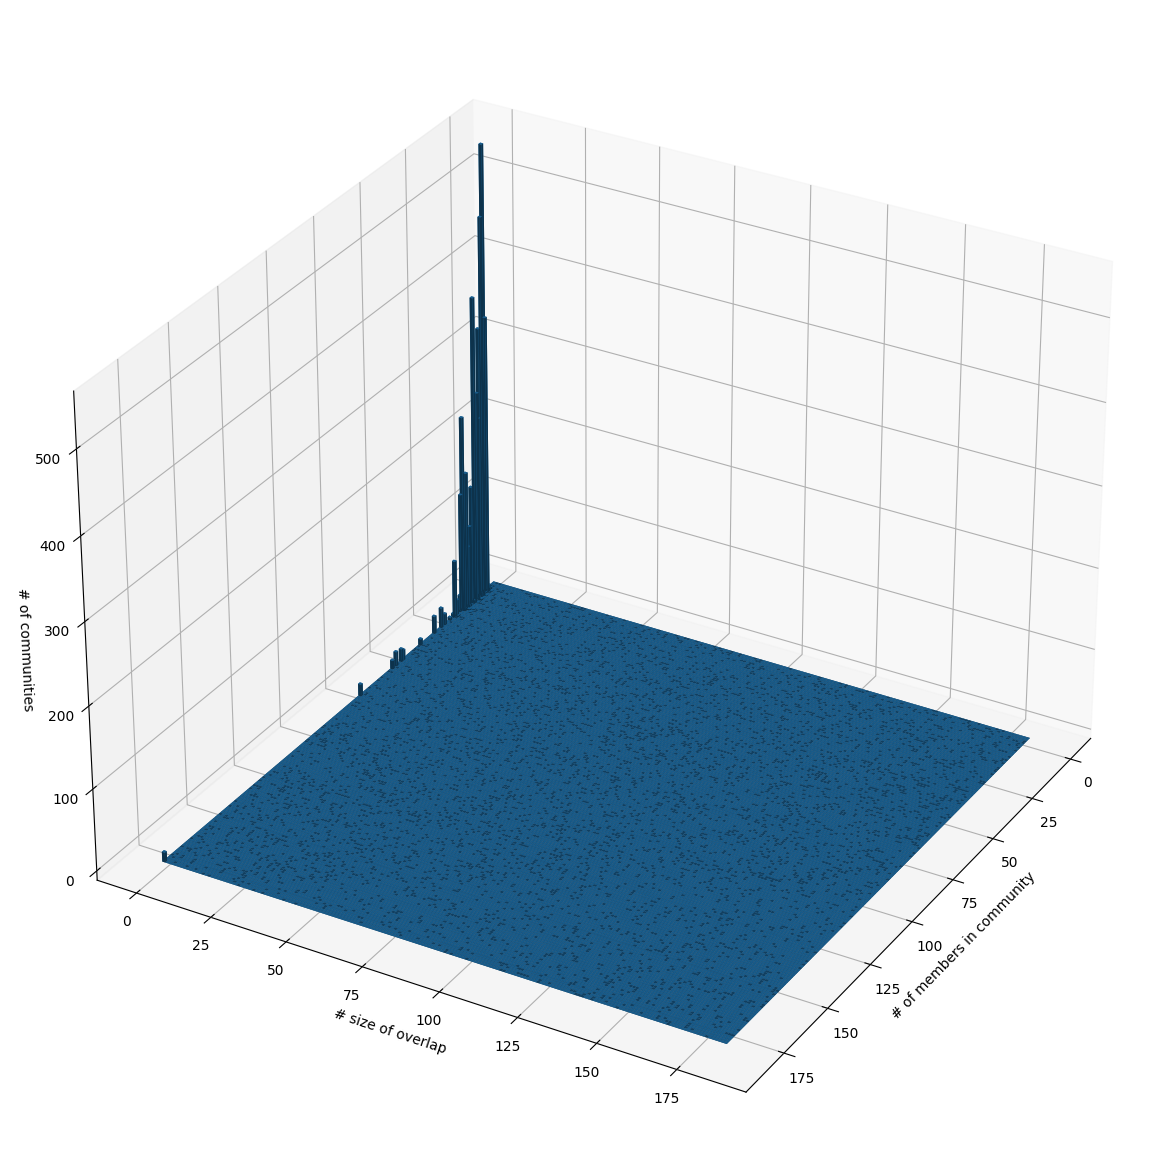

In [48]:
# create 3d plot
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection='3d')

ax.set_xlabel('# of members in community')
ax.set_ylabel('# size of overlap')
ax.set_zlabel('# of communities')

x, y = np.meshgrid(x_data, y_data)

top = z_data
bottom = np.zeros_like(top)
ax.view_init(ax.elev, ax.azim+90)
#ax.scatter3D(x_data, y_data, z_data, c=z_data, cmap='Greens');
ax.bar3d(x.ravel(), y.ravel(), bottom.ravel(), 1, 1, top.ravel(), shade=True)

In [107]:
# OLD -----------------------------
# find overlaps in communities
# looking for the biggest overlap for each community (TODO: is this what we want to do?)
numberOfOverlaps = 0
#for i in range(0, 100): # len(communities)
#    for j in range(i + 1, 100): # len(communities)
#        if i != j:
#            numberOfOverlaps = len(communities[i][2].intersection(communities[j][2]))
#
#        if numberOfOverlaps > communities[i][1]:
#            communities[i][1] = numberOfOverlaps
#        if numberOfOverlaps > communities[j][1]:
#            communities[j][1] = numberOfOverlaps
#        numberOfOverlaps = 0
#    if (i + 1) % 1000 == 0:
#        print('checked another 1k')

communitySizes = {}
for i in range(0, len(communities)):
    if not communities[i][0] in communitySizes:
        # TODO: add indices of communities with this size to list, we can then randomly choose some
        communitySizes[communities[i][0]] = [1, [i]]
    else:
        communitySizes[communities[i][0]][0] += 1
        communitySizes[communities[i][0]][1].append(i)



In [65]:
# calculate number of communities with the same overlap by sampling

# create data as list where every element is a list with 3 subelements
# subelement: [ # of members in community | size of overlap | # of combinations with these two parameters ]
data = {}
n = 10

for community_size in communitySizes.keys():
    data[community_size] = {}
    for i in range(0, 7302):
        data[community_size][i] = 0

# TODO: only check community sizes once, hence the inner loop needs to start at the next community size, not from
# the beginning of all community sizes
for community_size in communitySizes.keys():
    for other_community_size in communitySizes.keys():
        numberOfPossibleCombinations = communitySizes[community_size][0] * communitySizes[other_community_size][0]

        iterations = n
        if n > numberOfPossibleCombinations:
            #print("less combinations than chosen n, will use all number of combinations for pair: (" + str(community_size) + ", " + str(other_community_size) + ")")
            iterations = numberOfPossibleCombinations
        for i in range(0, iterations):
            # choose a random community out of both sizes
            # count their overlap
            # scale the result through the number of possible combinations
            idx = random.randrange(0, len(communitySizes[community_size][1]))

            first_community = communities[idx]

            idx = random.randrange(0, len(communitySizes[other_community_size][1]))

            second_community = communities[idx]

            sizeOfOverlap = len(first_community[2].intersection(second_community[2]))

            data[community_size][sizeOfOverlap] += 1

# print(data[4])

{0: 5679, 1: 11, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 1

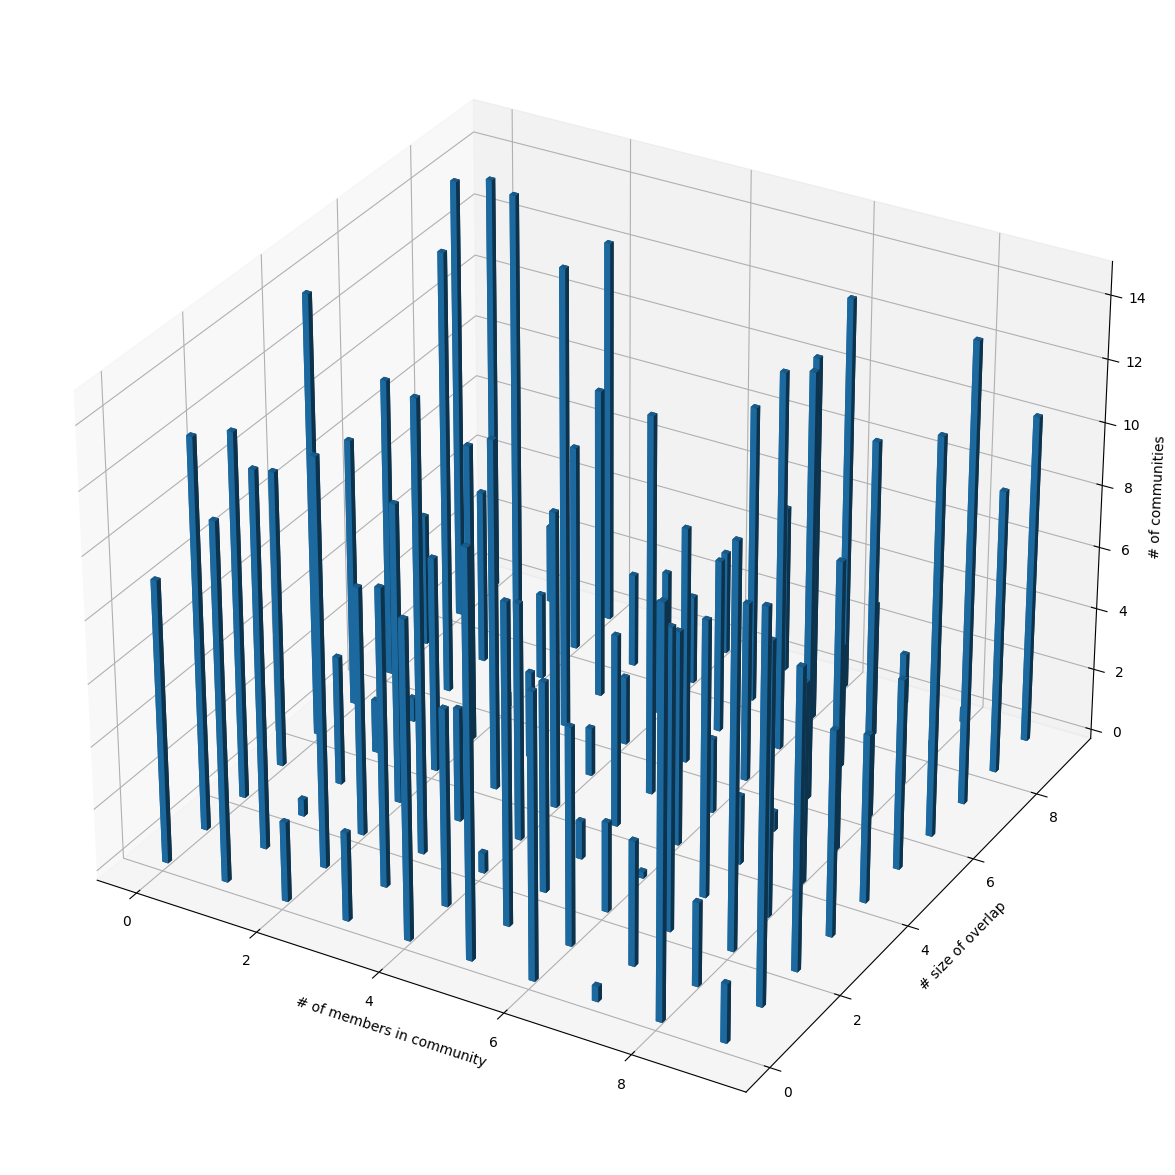

In [66]:
# create 3d plot
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection='3d')

ax.set_xlabel('# of members in community')
ax.set_ylabel('# size of overlap')
ax.set_zlabel('# of communities')

zdata = 15 * np.random.random(100)
xdata = np.arange(10)
ydata = np.arange(10)
xx, yy = np.meshgrid(xdata, ydata)
xdata, ydata = xx.ravel(), yy.ravel()

top = zdata
bottom = np.zeros_like(top)
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.bar3d(xdata, ydata, bottom, 0.1, 0.1, top, shade=True)